In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt


In [2]:
df = pd.read_excel('C:/Users/shind/Downloads/english_proficiency_dataset_updated.xlsx')

In [3]:
df 

,Initial Proficiency (%),Session Duration (minutes),Improvement Rate (%),Total Days Required,Minutes Per Day,Target Proficiency (%)
0,53.86,28.23,0.22,167,0.17,90
1,40.38,16.67,0.17,300,0.06,90
2,38.96,15.55,0.16,323,0.05,90
3,44.70,24.32,0.22,203,0.12,90
4,7.42,58.10,0.90,93,0.62,90
...,...,...,...,...,...,...
9995,65.09,10.12,0.06,424,0.02,90
9996,31.63,23.21,0.26,221,0.11,90
9997,19.49,47.95,0.64,110,0.44,90
9998,33.55,14.68,0.16,348,0.04,90


In [4]:
df.columns

Index(['Initial Proficiency (%)', 'Session Duration (minutes)',
       'Improvement Rate (%)', 'Total Days Required', 'Minutes Per Day',
       'Target Proficiency (%)'],
      dtype='object')

In [5]:
# Assuming you've loaded your dataset into a DataFrame 'df'
features = df[['Initial Proficiency (%)', 'Session Duration (minutes)',]] ##'Improvement Rate (%)'
target_days = df['Total Days Required']
target_minutes = df['Minutes Per Day']

# Split the data
X_train, X_test, y_train_days, y_test_days = train_test_split(features, target_days, test_size=0.2, random_state=42)
X_train, X_test, y_train_minutes, y_test_minutes = train_test_split(features, target_minutes, test_size=0.2, random_state=42)

In [6]:
# For predicting Total Days Required
model_days = DecisionTreeRegressor(random_state=42)
model_days.fit(X_train, y_train_days)

# For predicting Minutes Per Day 
model_minutes = DecisionTreeRegressor(random_state=42)
model_minutes.fit(X_train, y_train_minutes) 


DecisionTreeRegressor(random_state=42)

In [7]:
print(len(model_days.feature_importances_))


2


In [8]:
# Predict on the test set
pred_days = model_days.predict(X_test)
pred_minutes = model_minutes.predict(X_test)


In [9]:
# Evaluate Total Days Required model
mse_days = mean_squared_error(y_test_days, pred_days)
mae_days = mean_absolute_error(y_test_days, pred_days)

# Evaluate Minutes Per Day model
mse_minutes = mean_squared_error(y_test_minutes, pred_minutes)
mae_minutes = mean_absolute_error(y_test_minutes, pred_minutes)

print(f"Total Days Required - MSE: {mse_days}, MAE: {mae_days}")
print(f"Minutes Per Day - MSE: {mse_minutes}, MAE: {mae_minutes}")


Total Days Required - MSE: 5.478, MAE: 1.324
Minutes Per Day - MSE: 4.21e-05, MAE: 0.0029900000000000187


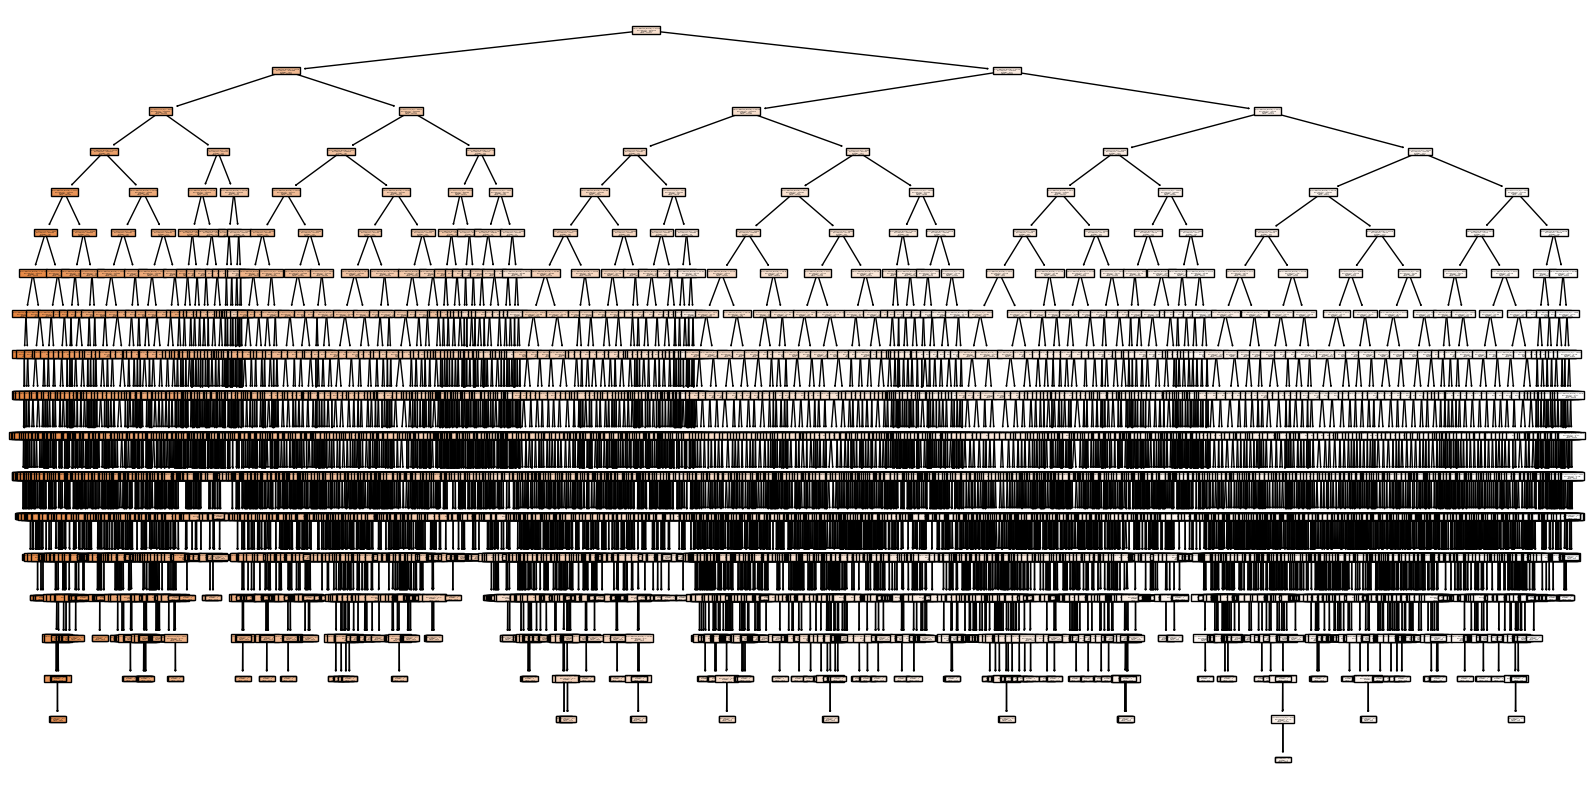

In [10]:
from sklearn import tree
import matplotlib.pyplot as plt

# Ensure that the number of features matches
feature_names = ['Initial Proficiency (%)', 'Session Duration (minutes)'] #,'Improvement Rate (%)'

plt.figure(figsize=(20,10))
tree.plot_tree(model_days, filled=True, feature_names=feature_names)
plt.show()


In [11]:
importance = model_days.feature_importances_
feature_names = ['Initial Proficiency', 'Session Duration']
for name, importance in zip(feature_names, importance):
    print(f"{name}: {importance:.4f}")


Initial Proficiency: 0.0618
Session Duration: 0.9382


In [12]:
model_days = DecisionTreeRegressor(max_depth=5, random_state=42)
model_days.fit(X_train, y_train_days)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [13]:
print(model_days.tree_.feature)

[ 1  1  0  1  1 -2 -2  1 -2 -2  0  1 -2 -2  1 -2 -2  0  1  1 -2 -2  1 -2
 -2  1  0 -2 -2  0 -2 -2  1  1  0  1 -2 -2  0 -2 -2  0  1 -2 -2  0 -2 -2
  1  0  1 -2 -2  0 -2 -2  0  1 -2 -2  0 -2 -2]


In [14]:
from sklearn.metrics import r2_score

# Predict on the test set
pred_days = model_days.predict(X_test)
pred_minutes = model_minutes.predict(X_test)

# Evaluate Total Days Required model
mse_days = mean_squared_error(y_test_days, pred_days)
mae_days = mean_absolute_error(y_test_days, pred_days)
r2_days = r2_score(y_test_days, pred_days)  # Calculate R² score

# Evaluate Minutes Per Day model
mse_minutes = mean_squared_error(y_test_minutes, pred_minutes)
mae_minutes = mean_absolute_error(y_test_minutes, pred_minutes)
r2_minutes = r2_score(y_test_minutes, pred_minutes)  # Calculate R² score 

# Print the results
print(f"Total Days Required - MSE: {mse_days}, MAE: {mae_days}, R²: {r2_days:.2f}")
print(f"Minutes Per Day - MSE: {mse_minutes}, MAE: {mae_minutes}, R²: {r2_minutes:.2f}")


Total Days Required - MSE: 157.04711508242963, MAE: 9.495566560020992, R²: 0.98
Minutes Per Day - MSE: 4.21e-05, MAE: 0.0029900000000000187, R²: 1.00


In [32]:
import joblib

# Save the model to a file in Colab 
joblib.dump(model_days, 'model_days.pkl')


['model_days.pkl']